# Issue #4 - Calibration plot

Instead of estimating class values explicitly for the classification problem, it might be easier to estimate the likelihood of an event belonging to each potential class. Predicting probabilities provides for some variability, including determining whether to view probabilities, posing forecasts with ambiguity, and offering more complex approaches to determine the ability of the model.

Predicted probabilities that suit the predicted likelihood distribution for each class are referred to as calibrated probabilities. The issue is that not all machine learning algorithms are capable of estimating calibrated probabilities. There are methods to both diagnose how calibrated predicted probabilities are and to better calibrate the predicted probabilities with the observed distribution of each class. Often, this can lead to better quality predictions, depending on how the skill of the model is evaluated.

Throughout this EDA, we will discover the importance of calibrating predicted probabilities and how to diagnose and improve the calibration of models used for probabilistic classification.

### Objective 
Assess how well the predicted class probabilities match the actual rate of occurrence in the dataset.


### Methodolgy
We write a function to create a calibration plot given one or more binary classifiers and a test set. For each model it would compute predicted probabilities for each test datapoint. These probability values should then be binned according to a scheme (eg. intervals of 10%), and the observed occurrence rate can be computed as the proportion of true positive class samples out of all samples in each bin. The plot then displays the observed occurrence rates vs the bin midpoints for each model.

A prepliminary analysis of our data set (defaults.csv) can be referenced [here](https://github.com/elie-wanko/PRESC/blob/Issue%232-Train_and_test_a_classification_model/dev/elie_wanko/Issue%20%232%20-%20Train%20and%20test%20a%20classification%20model.ipynb)

### EDA
#### Importing Libraries

In [1]:
# Basic Computations
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

from sklearn.calibration import calibration_curve
from sklearn.model_selection import train_test_split

# Dynamic Markdowns
from IPython.display import Markdown as md

import warnings; warnings.simplefilter('ignore')

In [2]:
# Adding module’s sub-directory to Pythons path
import os
import sys
sys.path.insert(0, os.path.abspath('../elie_wanko/modules'))
import cplots

#### Data Pre-Processing

Again, we preview our dataset just ot recall of the structure of the data.

In [3]:
df_data = pd.read_csv("defaults_data.csv")
df_data

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,defaulted
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


Now, we split our data into training and test sets based off the corresponding independent and target variables. We use a test size of 0.1, since it showed the best performance scores in a previous analysis in Issue #3.

In [4]:
# Split independent and target features
independ_attrs = df_data.filter(df_data.columns[:-1])
target_attrs = df_data.filter(df_data.columns[-1:])

# Split into train/test sets
x_train, x_test, y_train, y_test = train_test_split(independ_attrs, target_attrs, test_size=0.1)

#### Analysis

There are two concerns in calibrating probabilities; they are diagnosing the calibration of predicted probabilities and the calibration process itself.

In [5]:
# uncalibrated predictions
yhat_uncalibrated = cplots.uncalibrated(x_train, x_test, y_train)

# calibrated predictions
yhat_calibrated = cplots.calibrated(x_train, x_test, y_train)

# reliability diagrams
fop_uncalibrated, mpv_uncalibrated = calibration_curve(y_test, yhat_uncalibrated, n_bins=10, normalize=True)
fop_calibrated, mpv_calibrated = calibration_curve(y_test, yhat_calibrated, n_bins=10)


#### Results

Running the example creates a single reliability diagram showing both the calibrated (orange) and uncalibrated (blue) probabilities.

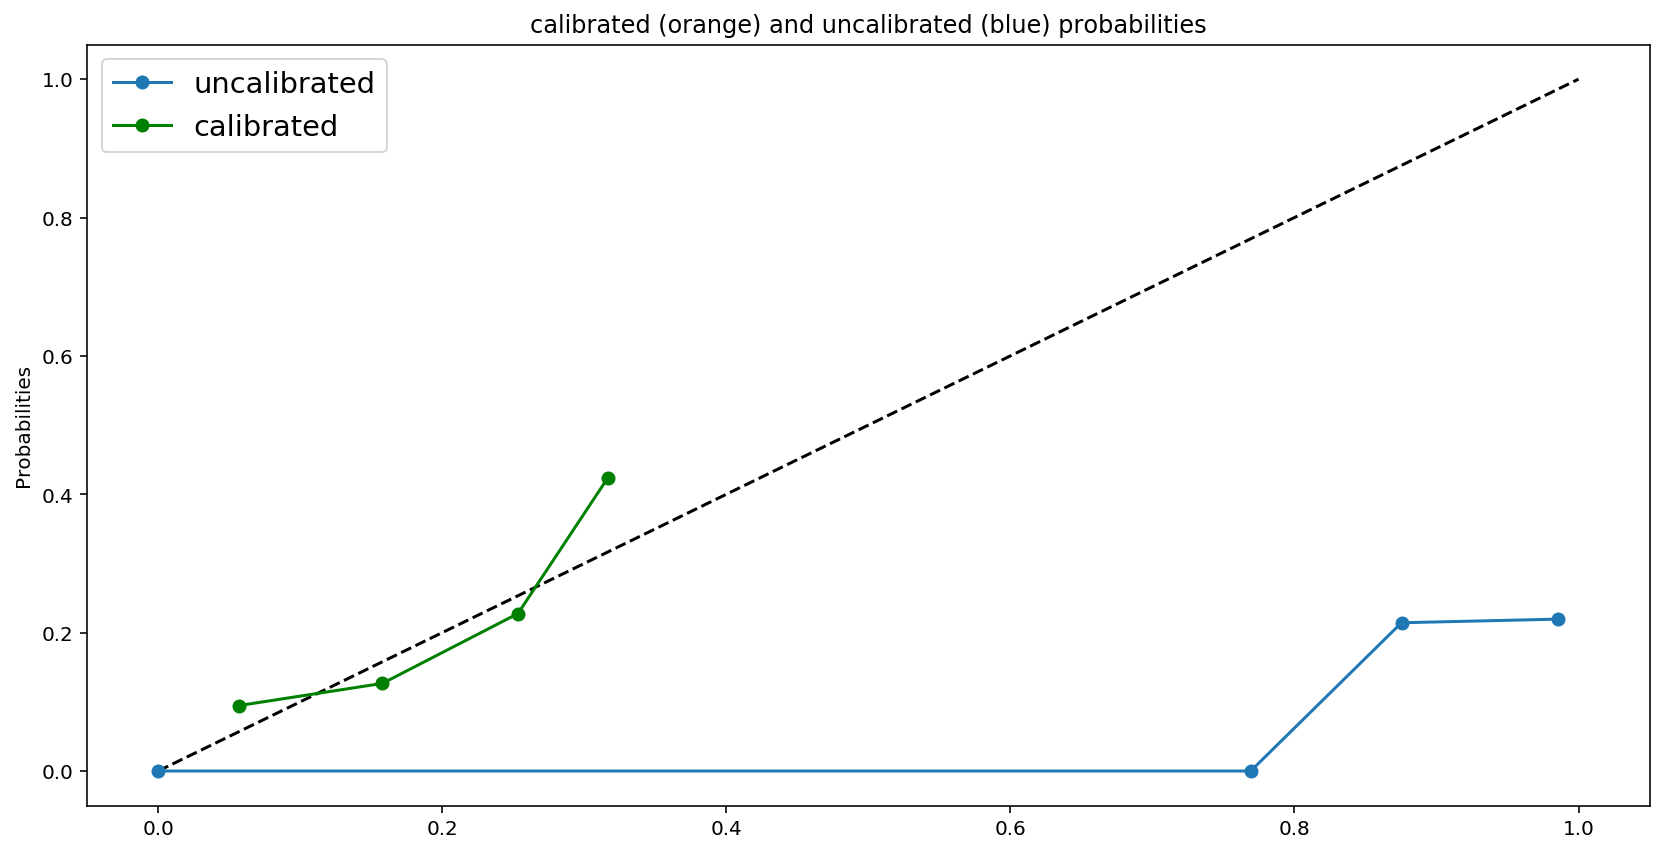

In [17]:
fig, ax = plt.subplots(figsize=(14, 7))

# plot perfectly calibrated
ax.plot([0, 1], [0, 1], linestyle='--', color='black')
# plot model reliabilities
ax.plot(mpv_uncalibrated, fop_uncalibrated, marker='o', label='uncalibrated')
ax.plot(mpv_calibrated, fop_calibrated, marker='o', color="green", label='calibrated')

# Labels
plt.title("calibrated (orange) and uncalibrated (blue) probabilities")
plt.ylabel("Probabilities")

# Plot legend
legend = ax.legend(loc='upper left', fontsize='x-large')
legend.get_frame()

plt.show()

### Conclusions



### References
* [Calibration curve](https://en.wikipedia.org/wiki/Calibration_curve)
* [How and When to Use a Calibrated Classification Model with scikit-learn](https://machinelearningmastery.com/calibrated-classification-model-in-scikit-learn/)